## Day 22 Lecture 2 Assignment

In this assignment, we will do apply the feature engineering techniques we have learned to create new features from existing ones. We will be using both the FIFA ratings dataset and the Chicago traffic crash dataset.

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer
import warnings
import datetime

warnings.simplefilter(action='ignore', category=FutureWarning)

In [140]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [90]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


We will start with the FIFA soccer ratings dataset. From our EDA in the previous exercise, we saw that most ratings appeared to be somewhat normally distributed, occasionally with long tails. Choose one of the ratings (we will choose Curve) and apply the following transformations:

- Log transformation
- Standardization
- Quantile transformation

Plot the resulting histograms. How do these transformations affect the resulting distributions?

In [91]:
soccer_data['Curve'].describe()

count    16122.000000
mean        51.254497
std         15.145165
min         11.000000
25%         39.000000
50%         52.000000
75%         63.000000
max         94.000000
Name: Curve, dtype: float64

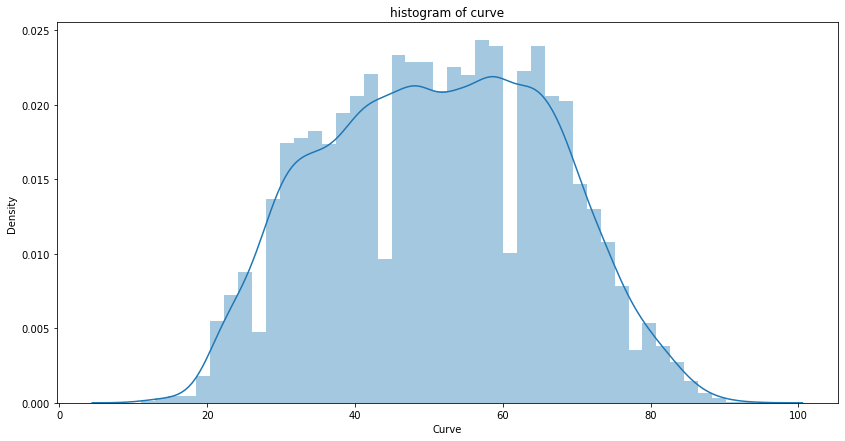

In [92]:
plt.figure(figsize=(14,7))
sns.distplot(soccer_data['Curve'])
plt.title("histogram of curve")
plt.show()

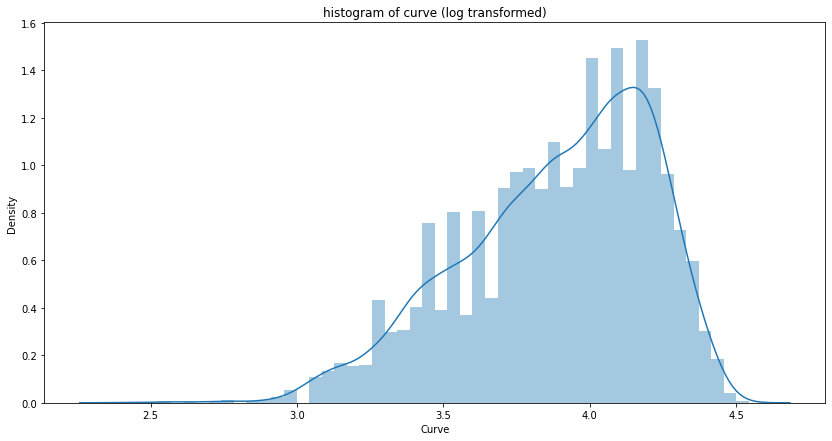

In [93]:
plt.figure(figsize=(14,7))
sns.distplot(np.log(soccer_data['Curve']))
plt.title("histogram of curve (log transformed)")
plt.show()

Text(0.5, 1.0, 'histogram of curve (standardization)')

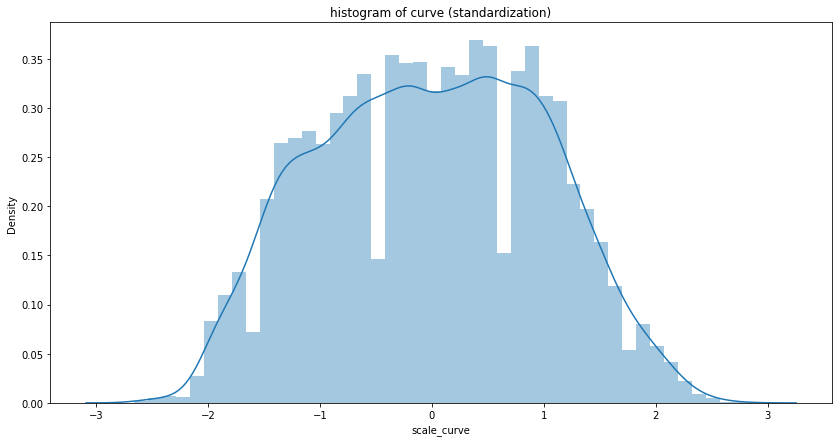

In [94]:
plt.figure(figsize=(14,7))
scaler = StandardScaler()
soccer_data['scale_curve'] = scaler.fit_transform(soccer_data[['Curve']])
sns.distplot(soccer_data['scale_curve'])
plt.title("histogram of curve (standardization)")

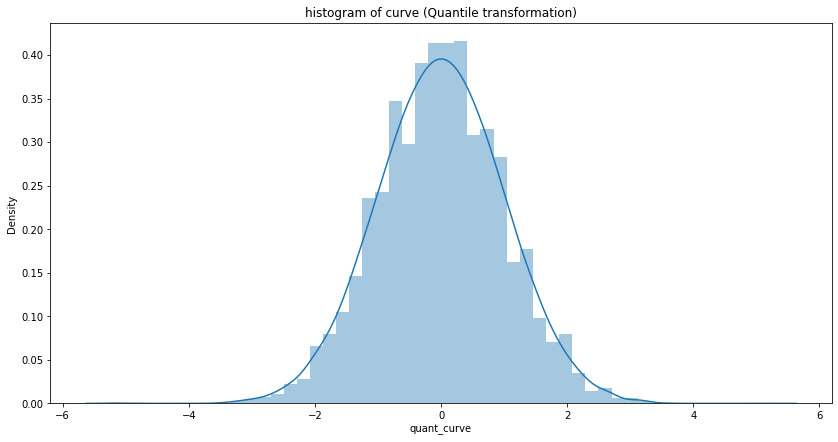

In [95]:
plt.figure(figsize=(14,7))
quantile = QuantileTransformer(output_distribution='normal')
soccer_data['quant_curve'] = quantile.fit_transform(soccer_data[['Curve']])
sns.distplot(soccer_data['quant_curve'])
plt.title("histogram of curve (Quantile transformation)")
plt.show()

The log transformation makes the distribution negatively skewed. 

The standardization keeps the shape the same, but centralizes the values around 0.

The quantile transformation smoothes the curve even more. 

Next, we will switch our focus to the Chicago traffic crashes dataset. We will create several new features using several common feature engineering techniques.

Start by considering the crash date column. It is usually difficult to directly feed datetimes into machine learning models, but we can extract several features from the datetime that may be more suitable for our use case. 

First, if the CRASH_DATE column is not already a datetime field (it may be read in as a string by default), convert it to a datetime. Then, create three new columns, CRASH_HOUR, CRASH_DAY_OF_WEEK, and CRASH_MONTH, that extract the relevant pieces of information from the crash date field. CRASH_HOUR should be numeric, while CRASH_DAY_OF_WEEK and CRASH_MONTH should be strings (e.g. "Monday" and "December", not 1 and 12).

In [112]:
# answer goes here
crash_data['CRASH_DATE'] = pd.to_datetime(crash_data['CRASH_DATE'])

In [113]:
#CRASH_HOUR, CRASH_DAY_OF_WEEK, and CRASH_MONTH
crash_data['CRASH_HOUR'] = pd.DatetimeIndex(crash_data['CRASH_DATE']).hour
crash_data['CRASH_DAY_OF_WEEK'] = pd.DatetimeIndex(crash_data['CRASH_DATE']).day_name()
crash_data['CRASH_MONTH'] = pd.DatetimeIndex(crash_data['CRASH_DATE']).month_name()

In [114]:
crash_data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,JC334993,2019-07-04 22:33:00,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/4/2019 23:05,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,Thursday,July
1,JC370822,2019-07-30 10:22:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/30/2019 10:25,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,Tuesday,July
2,JC387098,2019-08-10 17:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",8/10/2019 17:35,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,Saturday,August
3,JC395195,2019-08-16 16:53:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/16/2019 16:53,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,Friday,August
4,JC396604,2019-08-17 16:04:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/17/2019 18:30,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,Saturday,August


Next, we will work through an example that involves combining two existing features together to make a new one. Convert the DATE_POLICE_NOTIFIED column into a datetime (if it isn't one already), and create a new feature called "REPORTING_DELAY" which corresponds to the number of hours between the crash actually occurring and the police being notified. 

Plot a histogram and a frequency table of the features - are the results reasonable? If there are unusual results, which ones are they and what steps could we consider taking to address them (if such steps are necessary)?

In [115]:
# answer goes here
crash_data['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crash_data['DATE_POLICE_NOTIFIED'])
crash_data['REPORTING_DELAY'] = crash_data['DATE_POLICE_NOTIFIED']-crash_data['CRASH_DATE']
crash_data['REPORTING_DELAY_HOUR'] = ((pd.TimedeltaIndex(crash_data['DATE_POLICE_NOTIFIED']-crash_data['CRASH_DATE']).days*24) + (pd.TimedeltaIndex(crash_data['DATE_POLICE_NOTIFIED']-crash_data['CRASH_DATE']).seconds//3600))

In [116]:
crash_data[['CRASH_DATE', 'CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'DATE_POLICE_NOTIFIED', 'REPORTING_DELAY', 'REPORTING_DELAY_HOUR']].head()

,CRASH_DATE,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,DATE_POLICE_NOTIFIED,REPORTING_DELAY,REPORTING_DELAY_HOUR
0,2019-07-04 22:33:00,July,Thursday,22,2019-07-04 23:05:00,0 days 00:32:00,0
1,2019-07-30 10:22:00,July,Tuesday,10,2019-07-30 10:25:00,0 days 00:03:00,0
2,2019-08-10 17:00:00,August,Saturday,17,2019-08-10 17:35:00,0 days 00:35:00,0
3,2019-08-16 16:53:00,August,Friday,16,2019-08-16 16:53:00,0 days 00:00:00,0
4,2019-08-17 16:04:00,August,Saturday,16,2019-08-17 18:30:00,0 days 02:26:00,2


In [117]:
crash_data[['CRASH_DATE', 'CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'DATE_POLICE_NOTIFIED', 'REPORTING_DELAY', 'REPORTING_DELAY_HOUR']].describe()

,CRASH_HOUR,REPORTING_DELAY,REPORTING_DELAY_HOUR
count,372585.000000,372585,372585.000000
mean,13.180748,0 days 15:59:20.941422767,15.656956
std,5.452051,9 days 07:28:04.394709512,223.460851
min,0.000000,-1 days +23:03:00,-1.000000
25%,9.000000,0 days 00:08:00,0.000000
50%,14.000000,0 days 00:35:00,0.000000
75%,17.000000,0 days 02:35:00,2.000000
max,23.000000,2191 days 00:01:00,52584.000000


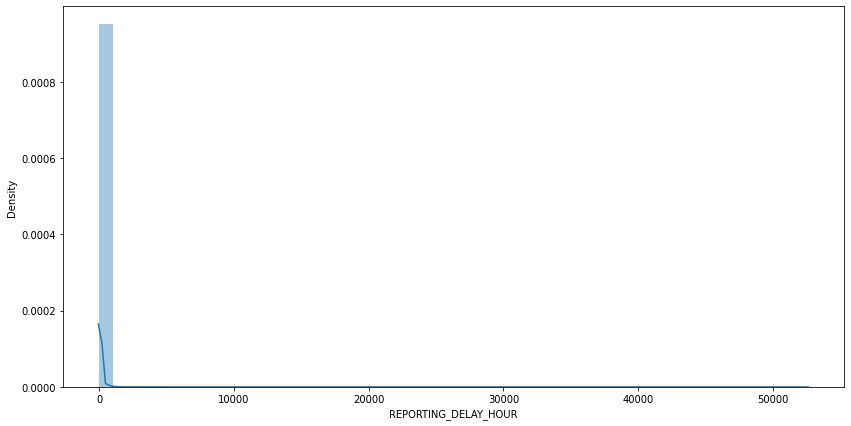

In [118]:
plt.figure(figsize=(14,7))
sns.distplot(crash_data['REPORTING_DELAY_HOUR'])
plt.show()

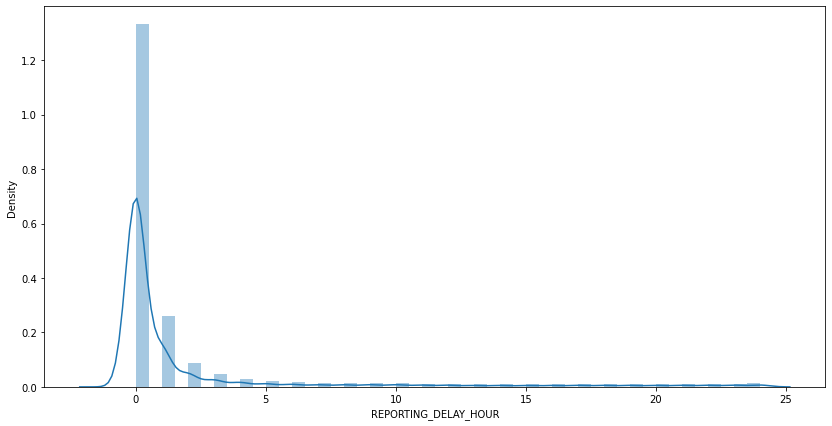

In [119]:
plt.figure(figsize=(14,7))
sns.distplot(crash_data['REPORTING_DELAY_HOUR'].loc[crash_data['REPORTING_DELAY_HOUR'] <= 24])
plt.show()

Some of the values are unusual. There is one instance when the police were notified before the accident and there are many accidents where the polices were notified days later (2191 days in one case). These are either errors or extremes that can probably be ignored. So, maybe only looking at delay times less than 24 hours is a good idea.

Finally, we will generate a new geographical feature from the BEAT_OF_OCCURRENCE field. This field contains 4-digit identifiers corresponding to areas within Chicago; however, some values may be shorter if the leading digit is 0 (i.e. beat "0114" is represented as "114").

Start by converting the the BEAT_OF_OCCURRENCE field into a string, dropping any unwanted characters that are present (chances are that this field was read in as a number and that "114" is represented as "114.0"; find a way to drop the ".0"), and adding the appropriate number of leading 0s so that every beat is four digits.

In [148]:
# answer goes here
crash_data['BEAT_OF_OCCURRENCE'].head()

0     114
1     631
2     332
3    1831
4    1921
Name: BEAT_OF_OCCURRENCE, dtype: int64

In [142]:
crash_data['BEAT_OF_OCCURRENCE'].isnull().sum()

4

In [143]:
crash_data['BEAT_OF_OCCURRENCE'].fillna(crash_data['BEAT_OF_OCCURRENCE'].value_counts().index[0], inplace=True)

In [147]:
crash_data['BEAT_OF_OCCURRENCE'].isnull().sum()

0

In [151]:
crash_data['BEAT_OF_OCCURRENCE'] = crash_data['BEAT_OF_OCCURRENCE'].astype(int).astype(str)

In [152]:
digits = []
for i in crash_data['BEAT_OF_OCCURRENCE']:
  while len(i) <= 4:
    if len(i) == 4:
      digits.append(i)
      i = '0' + i
    else:
      i = '0' + i


crash_data['BEAT_OF_OCCURRENCE'] = digits
crash_data['BEAT_OF_OCCURRENCE'].head()

0    0114
1    0631
2    0332
3    1831
4    1921
Name: BEAT_OF_OCCURRENCE, dtype: object

As it turns out, the first two digits of each beat correspond to a higher-level geographic area. For example, the higher-level beat "24" corresponds to a larger geographic area that is subdivided into beats 2411, 2412, etc. See below for a map illustrating this (in the map, the higher-level codes are three digits, but the first digit is always a zero):

https://news.wttw.com/sites/default/files/Map%20of%20Chicago%20Police%20Districts%20and%20Beats.pdf

Create a new feature called BEAT_TWO_DIGIT that corresponds to the higher-level two-digit geographic area.

As a side note, US zip codes work much the same way:

https://www.unitedstateszipcodes.org/images/zip-codes/zip-codes.png

This is a very common feature engineering technique for US zip codes. Many data sets will contain hundreds or thousands or zip codes, and attempting to feed a categorical variable with a very large number of levels into a model can often lead to problems (imagine trying to one-hot encode this; the number of columns would explode, and most of the columns would be very sparse.) Rolling up zip codes to a higher level loses some detail but greatly mitigates the issue of too many categories while still providing useful geographic insights on many occassions.

In [154]:
# answer goes here
crash_data['BEAT_TWO_DIGIT'] = [i[:2] for i in crash_data['BEAT_OF_OCCURRENCE']]

crash_data[['BEAT_OF_OCCURRENCE', 'BEAT_TWO_DIGIT']].head()

,BEAT_OF_OCCURRENCE,BEAT_TWO_DIGIT
0,0114,01
1,0631,06
2,0332,03
3,1831,18
4,1921,19
